1\. Write a function that converts number representation (bin<->dec<->hex)

In [ ]:
# decimal to binary

def dec_to_bin(a):
    
    # check the type
    if not isinstance(a, int):
        raise TypeError("This funtion is defined for integers")
        
    s = ""    
    if a > 0:
        s += "0b"
    elif a == 0:
        s += "0b0"
    else:
        s += "-0b"
        a = -a
       
    b = ""
    # last quozient grater than 0
    while a > 0:
        # save the remainder
        b += str(a % 2)
        # update the quozient
        a = a // 2
    
    # reverse the string
    b = b[::-1]
    
    return s+b

a = -23
a_bin = bin(a)
a_bin_f = dec_to_bin(a)

print("Binary representation of", a, ':', a_bin)
print("Binary representation of", a, ':', a_bin_f, "(my version)")

if a_bin == a_bin_f:
    print("Correct")
else:
    print("Wrong")
    
# decimal to hexadecimal

def dec_to_hex(a):
    
    # check the type
    if not isinstance(a, int):
        raise TypeError("This funtion is defined for integers")
        
    s = ""    
    if a > 0:
        s += "0x"
    elif a == 0:
        s += "0x0"
    else:
        s += "-0x"
        a = -a
       
    b = ""
    hex_symbols = {"10":"a", "11":"b", "12":"c", "13":"d", "14":"e", "15":"f"}
    # last quozient grater than 0
    while a > 0:
        # save the remainder
        c = str(a % 16)
        if c in hex_symbols:
            b += hex_symbols[c]
        else:
            b += c
        # update the quozient
        a = a // 16
    
    # reverse the string
    b = b[::-1]
    return s+b

a = -15
a_hex = hex(a)
a_hex_f = dec_to_hex(a)

print("Hexadecimal representation of", a, ':', a_hex)
print("Hexadecimal representation of", a, ':', a_hex_f, "(my version)")

if a_hex == a_hex_f:
    print("Correct")
else:
    print("Wrong")

# binary to decimal

def bin_to_dec(a):
    
    if a[0:2] != "0b" and a[0:3] != "-0b":
        raise TypeError("This funtion is defined for binary numbers")
    
    sign = False
    if a[0] == "-":
        sign = True
        a = a.replace("-0b", "")
    else:
        a = a.replace("0b", "")
        
    a = a[::-1]
    
    b = 0
    for i in range(len(a)):
        b += int(a[i])*(2)**i
    
    if sign:
        return -b
    else:
        return b

a = -23
a_bin = bin(a)
a_dec = int(a_bin, 2)
a_dec_f = bin_to_dec(a_bin)

print("Decimal representation of", a_bin, ':', int(a_bin, 2))
print("Decimal representation of", a_bin, ':', a_dec_f, "(my version)")

if a_dec == a_dec_f:
    print("Correct")
else:
    print("Wrong")
    
# hexadecimal to binary

def hex_to_bin(a):
    
    if a[0:2] != "0x" and a[0:3] != "-0x":
        raise TypeError("This funtion is defined for binary numbers")
    
    sign = False
    if a[0] == "-":
        sign = True
        a = a.replace("-0x", "")
    else:
        a = a.replace("0x", "")
        
    hex_to_bin_table = {"0":"0000", "1":"0001", "2":"0010", "3":"0011",
                        "4":"0100", "5":"0101", "6":"0110", "7":"0111",
                        "8":"1000", "9":"1001", "a":"1010", "b":"1011",
                        "c":"1100", "d":"1101", "e":"1110", "f":"1111"}
    
    b = ""
    for i in a:
        b += hex_to_bin_table[i]
     
    # discard any leading zeros
    for char in b:
        while b[0] == "0":
            b = b[1:]
    
    if sign:
        return "-0b" + b
    else:
        return "0b" + b
    
a = -15
a_hex = hex(a)
a_int = int(a_hex, 16)
a_bin = bin(a_int)
a_bin_f = hex_to_bin(a_hex)

print("Binary representation of", a_hex, ':', a_bin)
print("Binary representation of", a_hex, ':', a_bin_f, "(my version)")

if a_bin == a_bin_f:
    print("Correct")
else:
    print("Wrong")

2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [130]:
word = "11000000101100000000000000000000" # -> -5.5
#word = "00000011111000000000000000000000" # -> 1.316553672920962e-36
#word = "01111111100000000000000000000000" # -> +inf
#word = "11111111100000000000000000000000" # -> -inf
#word = "01111111110000000000000000000000" # -> NaN

def single_precision_float(a):
    bias = 127
    sign = int(a[0])
    exp = int(a[1:9],2)
    mantissa = 0
    for b,n in zip(a[9:32],range(1,24)):
        mantissa += int(b)*(2**(-n))
        
    # special values
    if sign == 0 and exp == 255 and mantissa == 0:
        return "+inf"
    if sign == 1 and exp == 255 and mantissa == 0:
        return "-inf"
    if exp == 255 and mantissa > 0:
        return "NaN"
    
    b = ((-1)**sign)*(1+mantissa)*(2**(exp-bias))
    return b

print(single_precision_float(word))

-5.5


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [163]:
import sys

under = 1
over = 1
N = 2000

for i in range(N):
    under = under/2.
    if under == 0:
        print("the underflow limit (within a factor of 2) is 2 to the power of", -i, "->", (1/2)**(i))
        f = sys.float_info.min
        print("sys.float_info.min:", f)
        print("diff:", f-(1/2)**i)
        break
        
print("\n...")
for i in range(N):
    over = over*2
    # print only the latest results
    if i >= 1020:
        try:
            # use scientific notation to convert an integer to a float
            # since Python 3 doesn't have a limit for integers
            # the only limitation is the (contiguous) space available in memory
            print("{:e}".format(over))
        except:
            print("the overflow limit (within a factor of 2) is 2 to the power of", i, "->", "{:e}".format(2**(i)))
            f = sys.float_info.max
            print("sys.float_info.max:", f)
            print("diff:", f-(2)**i)
            # a posteriori this is the max value
            break

the underflow limit (within a factor of 2) is 2 to the power of -1074 -> 5e-324
sys.float_info.min: 2.2250738585072014e-308
diff: 2.225073858507201e-308

...
2.247116e+307
4.494233e+307
8.988466e+307
the overflow limit (within a factor of 2) is 2 to the power of 1023 -> 8.988466e+307
sys.float_info.max: 1.7976931348623157e+308
diff: 8.988465674311578e+307


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [157]:
precision = 1
while (precision + 1 != 1):
    precision = precision/2
print(precision)

1.1102230246251565e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [9]:
import math

# a
def quadratic_1(a,b,c):
    x1 = (-b + math.sqrt(b**2-4*a*c))/(2*a)
    x2 = (-b - math.sqrt(b**2-4*a*c))/(2*a)
    return x1, x2

a = 0.001
b = 1000
c = 0.001

print(quadratic_1(a,b,c))

# b
def quadratic_2(a,b,c):
    x1 = (2*c)/(-b - math.sqrt(b**2-4*a*c))
    x2 = (2*c)/(-b + math.sqrt(b**2-4*a*c))
    return x1, x2

a = 0.001
b = 1000
c = 0.001

print(quadratic_2(a,b,c))

# c
def quadratic(a,b,c):
    x1 = 0
    x2 = 0
    
    if b >= 0:
        x1 = (-b - math.sqrt(b**2-4*a*c))/(2*a)
        x2 = (2*c)/(-b - math.sqrt(b**2-4*a*c))
    else:
        x1 = (2*c)/(-b + math.sqrt(b**2-4*a*c))
        x2 = (-b + math.sqrt(b**2-4*a*c))/(2*a)
        
    return x1, x2
    

print(quadratic(a,b,c))

(-9.999894245993346e-07, -999999.999999)
(-1.000000000001e-06, -1000010.5755125057)
(-999999.999999, -1.000000000001e-06)


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

delta = 0.01
accuracy = 0.010000000000000897
accuracy(%) = 0.9899999999999991


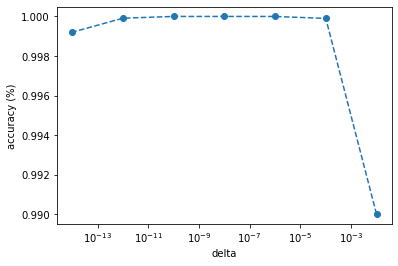

'\nthe numerical implementation of the derivative is not well defined\nwhen the delta becomes very small due to the rounding error\n'

In [66]:
def f(x):
    return x*(x-1)
def df_analytical(x):
    return 2*x-1
def df_numerical(x, delta):
    return (f(1+delta)-f(1))/(delta)


#a

x = 1
delta  = 0.01

print("delta =", delta)
print("accuracy =", df_numerical(x, delta)-df_analytical(x))
print("accuracy(%) =", 1-abs(df_numerical(x, delta)-df_analytical(x)))

"""
the difference is due to the fact that using this numerical implementation of the derivative
the error is proportional to delta (this can be demonstrated simply by performing a Taylor series expansion
of f(x+delta))
a possible solution is to use higher order methods to approximate the derivative.
"""

#b
import numpy as np
import matplotlib.pyplot as plt

x = 1
delta = [10**(-i) for i in range(2,15,2)]
accuracy = [1-abs(df_numerical(x, delta[i])-df_analytical(x)) for i in range(len(delta))]

plt.plot(delta, accuracy, 'o', linestyle='--')
plt.xlabel("delta")
plt.xscale('log')
plt.ylabel("accuracy (%)")
plt.show()

"""
the numerical implementation of the derivative is not well defined
when the delta becomes very small due to the rounding error
"""

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [127]:
import math
import time

def g(x):
    return math.sqrt(1-x**2)

#a

N = 100
h = 2/N
a = -1
b = 1
I = 0

for i in range(N):
    I += h*g(a+h*i)
    
print("slices =", N)
print("accuracy =",(math.pi/2)-I)
print("accuracy(%) =",1-abs((math.pi/2)-I))

#b

N = 100
h = 2/N
a = -1
b = 1
I = 0

sec = True
while(sec):
    I_curr = 0
    tic = time.perf_counter()
    for i in range(N):
        I_curr += h*g(a+h*i)
    toc = time.perf_counter()
    if (toc - tic < 1):
        N = N*2
        h = 2/N
        I = I_curr      
    else:
        sec = False
        #print(toc - tic)
        
print("max slices for integration in less than 1 sec =", int(N/2))
print("accuracy =",(math.pi/2)-I)
print("accuracy(%) =",1-abs((math.pi/2)-I))

#b2

N = 100
h = 2/N
a = -1
b = 1
I = 0

sec = True
while(sec):
    I_curr = 0
    tic = time.perf_counter()
    for i in range(N):
        I_curr += h*g(a+h*i)
    toc = time.perf_counter()
    if (toc - tic < 10):
        N = N*2
        h = 2/N
        I = I_curr      
    else:
        sec = False
        #print(toc - tic)
        
print("max slices for integration in less than 10 sec =", int(N/2))
print("accuracy =",(math.pi/2)-I)
print("accuracy(%) =",1-abs((math.pi/2)-I))

"""
there is no significant gain in increasing the slicing to make the algorithm run for almost 1 minute
"""

slices = 100
accuracy = 0.0016620712456461018
accuracy(%) = 0.9983379287543539
max slices for integration in less than 1 sec = 409600
accuracy = 6.3441727427004935e-09
accuracy(%) = 0.9999999936558273
max slices for integration in less than 10 sec = 6553600
accuracy = 9.91431381436314e-11
accuracy(%) = 0.9999999999008569


'\nthere is no significant gain in increasing the slicing to make the algorithm run for almost 1 minute\n'